<a href="https://colab.research.google.com/github/Saneesh122/Data-Processing-Visualization-/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exam- 1


Sanish Shrestha 

Data Visualization (CPSMA 4313)

Date:- 2/14/2022

References:-

 https://github.com/Saneesh122/Data-Processing-and-Visualization-

 https://github.com/nurfnick/Data_Viz

 https://en.wikipedia.org/wiki/List_of_mountains_by_elevation

 https://github.com/greenelab/wiki-nationality-estimate

 https://erikrood.com/Python_References/pandas_column_average_median_final.html

 https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/

https://stackoverflow.com/

“I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.” 

**Let's begin by getting authenticated from google:-**

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
#for authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Now that I have done with the authentication process let's do solving the problems. 

**GROUP- 1**

**First, I will be gathering the table on 8000 km mountains from the wikipedia page of mountains by elevation**

In [ ]:
dataframe= pd.read_html('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')[0]
dataframe

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


The above code used on-gave me the data of 8000km moutains with the help of wikipedia


**Now jumping on next I will try to find the data of returning only mountains in the ‘Himalayas’ Range**

In [ ]:
dataframe[dataframe.Range == 'Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


**Now I will be coding to get the bar chart of the ranges down below:-**

First step will be counting count how many Himalayas and Karakoram Range are there 

In [ ]:
range_count= dataframe.groupby('Range').count()
range_count

,Mountain,Metres,Feet,Location and Notes
Range,,,,
Himalayas,10,10,10,10
Karakoram,4,4,4,4


Now that I have received the total number of Himalayas and Karakoram range, it is time to plot the bar chart down below:- 

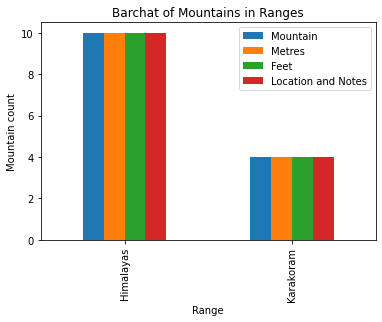

In [ ]:
range_count.plot(kind ='bar',title = 'Barchat of Mountains in Ranges', ylabel = 'Mountain count')

**Creating a box plot of height in feet:-**

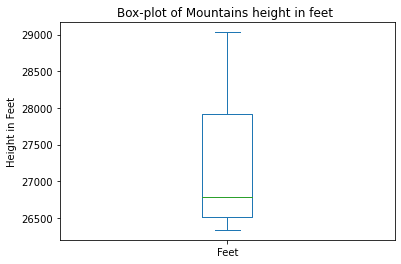

In [ ]:
dataframe.Feet.plot(kind ='box', title = 'Box-plot of Mountains height in feet ', ylabel = 'Height in Feet')

In [ ]:
import pandas as pd
import numpy as np

**Let's hop in to another question which is finding the the mean, standard deviation and five number summary of the height in feet**:- 

In [ ]:
dataframe.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

**Now, let's find the mean and median of mountains when grouped by their Range**.

For mean data:-

In [ ]:
mean=dataframe.groupby('Range').mean()
mean

,Metres,Feet
Range,,
Himalayas,8319.80,27295.9
Karakoram,8194.25,26884.0


For median data:-

In [ ]:
median=dataframe.groupby('Range').median()
median

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


This is the end of the group 1 questions. 

**Group- 2**

**Using of Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface down below:- **

First lets go ahead and find the total rows in the dataset:- 

In [ ]:
%%bigquery --project projectfordatavisualization
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


Then, i will write a code to find the average trip total based on payment type:-

In [ ]:
%%bigquery --project projectfordatavisualization
SELECT payment_type, 
  AVG(trip_total) as Average_total_trip_cost
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE payment_type is not null
GROUP BY payment_type

,payment_type,Average_total_trip_cost
0,No Charge,15.836177
1,Way2ride,16.639366
2,Split,18.788039
3,Credit Card,20.524892
4,Prcard,20.320682
5,Prepaid,22.377662
6,Cash,12.265548
7,Unknown,17.649893
8,Mobile,20.339910
9,Dispute,15.496588


**Finding how many trips, that had a non-zero recorded time, were above the average time?**

For the question asked lets go ahead and fing the average second at first which will help me to get the non zero recorded time. 

In [ ]:
%%bigquery --project projectfordatavisualization
SELECT AVG(trip_seconds) as avg_seconds 
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,avg_seconds
0,792.717188


Now, lets get the data of trips that had non-zero recorded time:-

In [ ]:
%%bigquery --project projectfordatavisualization
SELECT COUNT(*) as None_zero_no_of_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds !=0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_seconds FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,None_zero_no_of_trips_above_avg_time
0,62143014


Questions about exams:-

1) Approximately how long did you work on this exam? 
   - About 2 hours 

2) Which was the hardest and easiest topic from this section?

   - Hardest was to find the mean and median and the easiest was finding average trip total based on payment type.

3) Which method of gathering data are you most excited to use again?

   - I would choose pandas method of gathering data.


   